In [5]:
import basemath_analysis.basemath as bm
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## Generating input data
## The success metric is binary here:
## Either a visitors turns into a customer (1) or they don't (0)

avg_visitors = 250_000 # average number of visitors per day and variation
cr_A = 0.025 # conversion rate of control
cr_uplift = 0.00 # relative uplift of treatment <- no uplift => cr_A = cr_B
days = 30 # number of simulated days

num_visitors = np.abs(np.random.normal(avg_visitors - 1, avg_visitors * 0.1, days).astype(int)) + 1
customers_A = np.random.binomial(n=num_visitors, p=cr_A)
customers_B = np.random.binomial(n=num_visitors, p=cr_A*(1+cr_uplift))
customers_delta = customers_B - customers_A

In [4]:
## Running Basemath

# input parameters
mean_A = np.sum(customers_A) / np.sum(num_visitors)
mde = 0.01
alpha = 0.05
beta = 0.2
exp_name = "test_experiment_abc"

# initialise
bm_test = bm.BaseMathsTest(mean_A, mde, alpha, beta, seed = exp_name)

# day-by-day evaluation
experiment_state = 0
agg_visitors_seen_before = 0
agg_cust_delta_seen_before = 0
curr_day = 0

# variables requires for plotting (next cell)
visitors_per_day = []
cust_diff_per_day = []

for day in range(days):
    experiment_state = bm_test.evaluate_experiment(
        agg_cust_delta_seen_before,
        customers_delta[day],
        agg_visitors_seen_before,
        num_visitors[day]
    )

    curr_day = day
    agg_visitors_seen_before += num_visitors[day]
    agg_cust_delta_seen_before += customers_delta[day]
    
    visitors_per_day += [agg_visitors_seen_before]
    cust_diff_per_day += [agg_cust_delta_seen_before]
    
    print("Visitors by day {}:\n {} out of {} ({}%)\n\n"
          .format(
              day + 1,
              agg_visitors_seen_before,
              bm_test.required_samples,
              np.round(agg_visitors_seen_before/bm_test.required_samples*100, 2)
          )
         )

    if experiment_state != 0:
        break

print(experiment_state)
        
# summary
print(f"The experiment evaluation was stopped after {curr_day + 1} days.")
if experiment_state == 1:
    print("Treatment is significantly better than control.")
elif experiment_state == -1:
    print("Treatment is NOT significantly better than control.")
elif experiment_state == 0:
    print("Experiment stopped without conclusion. Not enough data.")
    print(f"{np.sum(num_visitors)} data points per day provided, {bm_test.required_samples} required")

Visitors by day 1:
 284787 out of 5405205 (5.27%)


Visitors by day 2:
 521741 out of 5405205 (9.65%)


Visitors by day 3:
 801814 out of 5405205 (14.83%)


Visitors by day 4:
 1081771 out of 5405205 (20.01%)


Visitors by day 5:
 1326751 out of 5405205 (24.55%)


Visitors by day 6:
 1583508 out of 5405205 (29.3%)


-1
The experiment evaluation was stopped after 6 days.
Treatment is NOT significantly better than control.


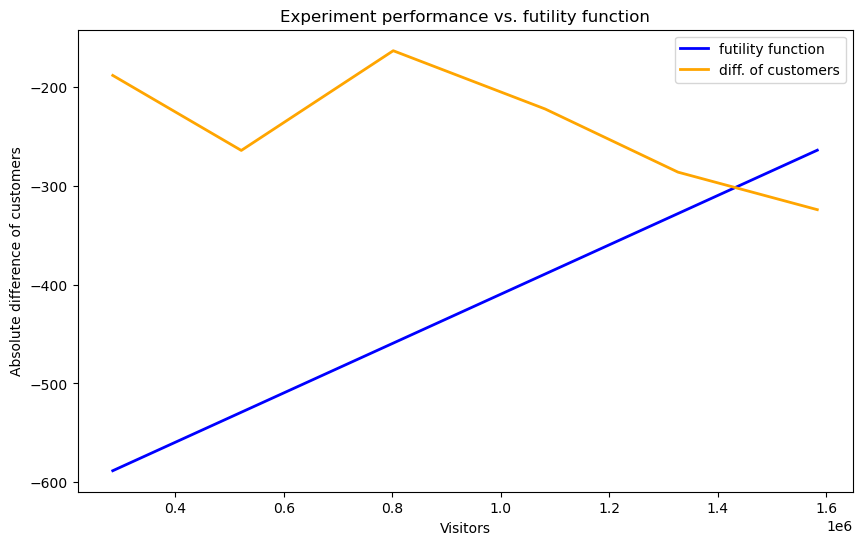

In [15]:
# graph: absolute difference in performance vs. futility bound

intercept = bm_test.intercept
x = np.array(visitors_per_day)
y_bound = np.array(visitors_per_day) * cr_A * mde + intercept
y_perf = np.array(cust_diff_per_day)

# Plotting the functions
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.plot(x, y_bound, label='futility function', color='blue', linewidth=2)
plt.plot(x, y_perf, label='diff. of customers', color='orange', linewidth=2)

# Adding labels and title
plt.xlabel('Visitors')
plt.ylabel('Absolute difference of customers')
plt.title('Experiment performance vs. futility function')

# Adding legend
plt.legend()

# Display the plot
plt.show()

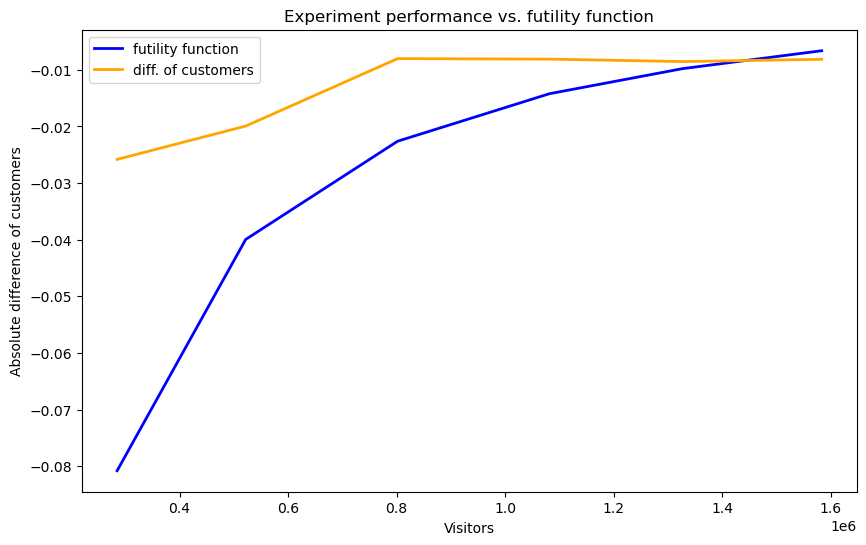

In [18]:
# graph: relative uplift in performance vs. futility bound
# observe: relative cr uplift = cr_B / cr_A - 1 = (c_B - c_A) / c_A
# with c_x being the customers of each variation assuming that the number of visitors is equal for both variations

intercept = bm_test.intercept
x = np.array(visitors_per_day)
y_bound = (np.array(visitors_per_day) * cr_A * mde + intercept) / np.cumsum(customers_A[:curr_day + 1])
y_perf = np.array(cust_diff_per_day) / np.cumsum(customers_A[:curr_day + 1])

# Plotting the functions
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.plot(x, y_bound, label='futility function', color='blue', linewidth=2)
plt.plot(x, y_perf, label='diff. of customers', color='orange', linewidth=2)

# Adding labels and title
plt.xlabel('Visitors')
plt.ylabel('Relative uplift of ')
plt.title('Experiment performance vs. futility function')

# Adding legend
plt.legend()

# Display the plot
plt.show()

In [17]:
np.cumsum(customers_A[:curr_day + 1])

array([ 7282, 13243, 20309, 27370, 33472, 39795])